<a href="https://colab.research.google.com/github/Pedro69491/ML-Algorithms/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#7.2
#Implement the K-means algorithm from scratch. Use your implementation and
#segment the image so that you’ll have 5 different prototypes in each color channel. Report how you initialised your method and illustrate the segmentation result.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from numba import jit, cuda



img = cv2.imread('/content/test_image.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imwrite('/content/test_image.png', img)


imgs = img.reshape(-1, 3)


# or img = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

#Convert into a float
#img = np.float32(img)

#for i in img:
  #print(i)

#imgs = imgs[:1000]
#img[img==255] = 1



In [ ]:
class K_means():
  
  def __init__(self, imgs, n_centroids):
    self.imgs = imgs
    self.k = n_centroids
    self.max_iterations = 5
    self.centroids = [[] for i in range(self.k)]
    self.labels = []

  def initialize_centroid(self):
    for i in range(self.k):
      self.centroids[i] = np.random.choice(256, self.imgs.shape[1])
    self.create_clusters(self.centroids)
    print(self.centroids)
  
  def create_clusters(self, centroids):
    self.clusters = [[] for i in range(self.k)]
    for i in self.imgs:
      self.clusters[self.euclidean_distance(i, self.centroids)].append(i)  
    
    #avoiding empty clusters
    for i in range(self.k):
      if len(self.clusters[i]) == 0:
        self.initialize_centroid()
    

  def update_centroid(self): 
    counter = 0
    for i in range(self.max_iterations):
      counter += 1
      print(counter)
      new_centroids = [[] for i in range(self.k)]
      for num in range(self.k):
        new_centroids[num] = np.mean(self.clusters[num], 0)
      #if self.is_completed(self.centroids, new_centroids):
        #break
      #else:
      self.centroids = new_centroids
      self.create_clusters(self.centroids)

    self.final_result()

  def euclidean_distance(self, point, centroids):
    min = math.inf
    cluster = 0
    for num in range(self.k):
      diff = np.linalg.norm(point-centroids[num])
      if min >= diff:
        min = diff
        cluster = num
    return cluster

  def dist_centroids(self, mean_old, mean_new):
    return mean_old - mean_new

  def final_result(self):
    print(self.centroids)
    for point in self.imgs:
      self.labels.append(self.euclidean_distance(point, self.centroids))
    

  def is_completed(self, old, new):
    distances = [self.dist_centroids(old[i], new[i]) for i in range(self.k)]
    return sum(distances) == 0
    

In [ ]:
a = K_means(imgs, 3)
a.initialize_centroid()
a.update_centroid()

[array([ 35,  36, 222]), array([ 81,  98, 166]), array([191, 149,  56])]
1
2
3
4
5
[array([ 73.51855917, 117.16880713, 196.10980876]), array([83.73361619, 73.2258812 , 70.23431245]), array([197.55698461, 189.88730812, 171.92131169])]


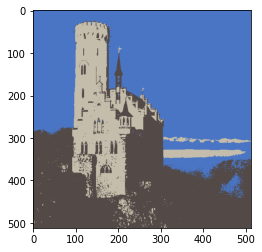

In [ ]:
labels = [1,2,3,1,3,2,3,4]

segmented_image = centers[a.labels]

segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image)

plt.show()